<a href="https://colab.research.google.com/github/tylerdn7/project-445/blob/master/Lanl_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install kaggle

!pip install numpy==1.15.0

!pip install catboost

    100% |████████████████████████████████| 13.9MB 2.5MB/s 
datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
  Found existing installation: numpy 1.16.2
    Uninstalling numpy-1.16.2:
      Successfully uninstalled numpy-1.16.2


    100% |████████████████████████████████| 60.6MB 619kB/s 


In [0]:
import pandas as pd

import numpy as np

import seaborn as sns

import io

import os

import xgboost as xgb

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import SGDRegressor

from sklearn.ensemble import RandomForestRegressor

from catboost import CatBoostRegressor, Pool

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

from sklearn.svm import NuSVR, SVR

import matplotlib.pyplot as plt

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 62 bytes


In [3]:
!kaggle competitions download -c LANL-Earthquake-Prediction

  0% 0.00/33.3k [00:00<?, ?B/s]
100% 33.3k/33.3k [00:00<00:00, 13.3MB/s]
100% 242M/242M [00:01<00:00, 202MB/s]

100% 2.02G/2.03G [00:21<00:00, 91.9MB/s]
100% 2.03G/2.03G [00:22<00:00, 98.0MB/s]


In [4]:
!unzip train.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               


In [5]:

seg_id = pd.read_csv('sample_submission.csv')
seg_id.head()

,seg_id,time_to_failure
0,seg_00030f,0
1,seg_0012b5,0
2,seg_00184e,0
3,seg_003339,0
4,seg_0042cc,0


In [6]:
!unzip test.zip

Archive:  test.zip
  inflating: seg_430e66.csv          
  inflating: seg_d1a281.csv          
  inflating: seg_05a1b0.csv          
  inflating: seg_f8dd7e.csv          
  inflating: seg_b9bdd7.csv          
  inflating: seg_24c1c9.csv          
  inflating: seg_c5abaa.csv          
  inflating: seg_6262c4.csv          
  inflating: seg_734a88.csv          
  inflating: seg_94a133.csv          
  inflating: seg_d0c280.csv          
  inflating: seg_d36737.csv          
  inflating: seg_f80e44.csv          
  inflating: seg_07c815.csv          
  inflating: seg_7c9433.csv          
  inflating: seg_211486.csv          
  inflating: seg_78ded2.csv          
  inflating: seg_f11f77.csv          
  inflating: seg_b3883e.csv          
  inflating: seg_3db0a8.csv          
  inflating: seg_81f798.csv          
  inflating: seg_0a45a1.csv          
  inflating: seg_dc188b.csv          
  inflating: seg_4a9e8d.csv          
  inflating: seg_32fc4e.csv          
  inflating: seg_7b2994.csv    

In [7]:
file_names = []

for ids in range(seg_id.shape[0]):
  file_names.append(seg_id['seg_id'][ids] + '.csv')
  
file_names[0:5]

['seg_00030f.csv',
 'seg_0012b5.csv',
 'seg_00184e.csv',
 'seg_003339.csv',
 'seg_0042cc.csv']

In [8]:
len(file_names)

2624

In [9]:
y_trains = pd.read_csv(file_names[0])
y_trains.head()

,acoustic_data
0,4
1,0
2,-2
3,0
4,2


In [10]:
y_trains.describe()

,acoustic_data
count,150000.00000
mean,4.49178
std,4.89369
min,-75.00000
25%,2.00000
50%,4.00000
75%,7.00000
max,115.00000


In [0]:
signal = pd.read_csv('train.csv', nrows=6000000, dtype={'acoustic_data': np.int16, 'time_to_failure': np.float64})

In [12]:
signal.head()

,acoustic_data,time_to_failure
0,12,1.4691
1,6,1.4691
2,8,1.4691
3,5,1.4691
4,8,1.4691


In [13]:

#Data Types of given signal

signal.dtypes

acoustic_data        int16
time_to_failure    float64
dtype: object

In [14]:
# Statistical Analysis of data

signal.describe()

,acoustic_data,time_to_failure
count,6.000000e+06,6.000000e+06
mean,4.545660e+00,1.350958e+00
std,2.277303e+01,2.533610e+00
min,-4.621000e+03,7.954798e-04
25%,2.000000e+00,3.902964e-01
50%,5.000000e+00,7.796974e-01
75%,7.000000e+00,1.169098e+00
max,3.252000e+03,1.154080e+01


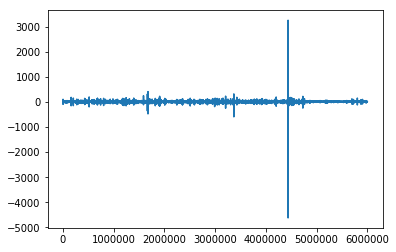

In [15]:
# Training Dataset for Acoustic data

plt.plot(signal['acoustic_data'].values)
plt.show()

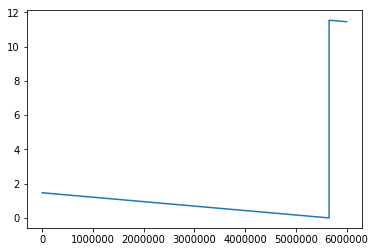

In [16]:
# time to failure training data plot

plt.plot(signal['time_to_failure'].values)
plt.show()

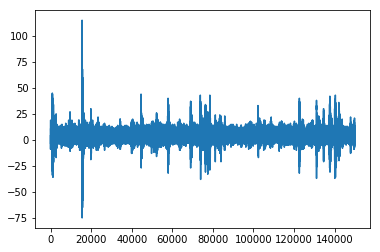

In [17]:
# testing dataset plot

plt.plot(y_trains['acoustic_data'].values)
plt.show()

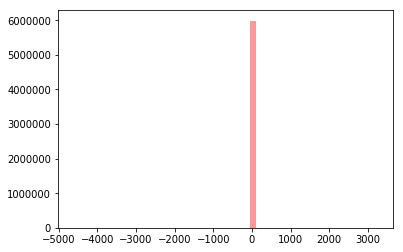

In [0]:
# Distribution of acoustic data

sns.distplot(signal.acoustic_data.values, color="Red", kde=False)
plt.show()

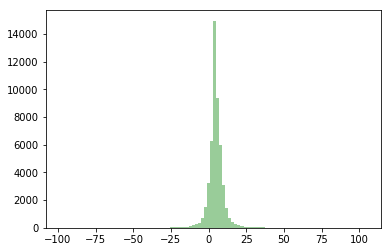

In [0]:
# Distribution of small part of acoustic data

sns.distplot(signal.acoustic_data.values[0:50000], color="Green", bins=100, kde=False)
plt.show()

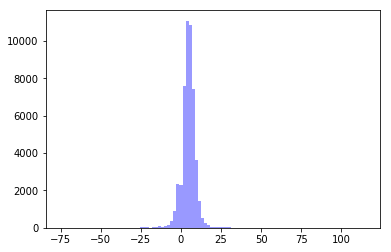

In [0]:
# Distribution of small part of acoustic data

sns.distplot(y_trains.acoustic_data.values[0:50000], color="Blue", bins=100, kde=False)
plt.show()

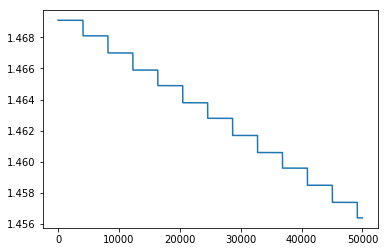

In [0]:
# Plotting first 50000 values of time_to_failure

plt.plot(signal['time_to_failure'].values[0:50000])
plt.show()

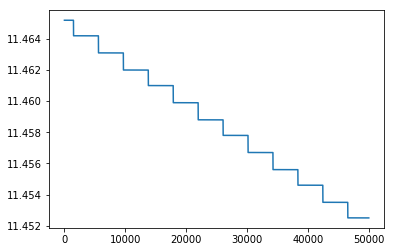

In [0]:
# Plotting in-between 5000 values of time_to_failure

plt.plot(signal['time_to_failure'].values[5950000:6500000])
plt.show()

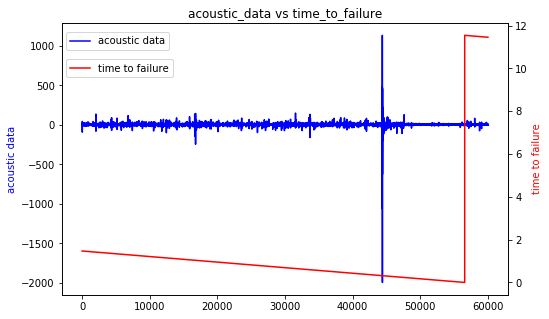

In [0]:
# Acoustic-data vs time-to-failure

fig, ax1 = plt.subplots(figsize=(8,5))
plt.title('acoustic_data vs time_to_failure')
plt.plot(signal['acoustic_data'].values[::100], color='b')
ax1.set_ylabel('acoustic data', color='b')
plt.legend(['acoustic data'], loc=(0.01, 0.9))
ax2 = ax1.twinx()
plt.plot(signal['time_to_failure'].values[::100], color='r')
ax2.set_ylabel('time to failure', color='r')
plt.legend(['time to failure'], loc=(0.01, 0.8))
plt.show()

In [0]:
signalplot = pd.read_csv('train.csv', nrows=6000000, dtype={'acoustic_data': np.int16, 'time_to_failure': np.float64})
signalplot.head()
signalplot.info()
signalplot.describe()
signalplot.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000000 entries, 0 to 5999999
Data columns (total 2 columns):
acoustic_data      int16
time_to_failure    float64
dtypes: float64(1), int16(1)
memory usage: 57.2 MB


Index(['acoustic_data', 'time_to_failure'], dtype='object')

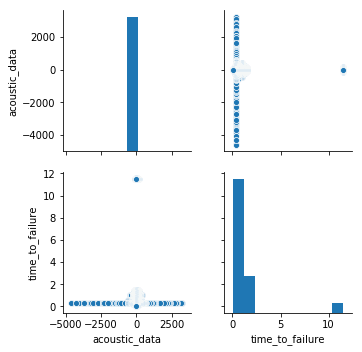

In [0]:
sns.pairplot(signalplot)

In [0]:
# correlation between acoustic_data and time_to_failure
signalplot.corr()

,acoustic_data,time_to_failure
acoustic_data,1.000000,-0.001651
time_to_failure,-0.001651,1.000000


In [0]:
def gen_features(X):
    strain = []
    strain.append(X.mean())
    strain.append(X.std())
    strain.append(X.min())
    strain.append(X.max())
    strain.append(X.kurtosis())
    strain.append(X.skew())
    strain.append(np.quantile(X,0.01))
    strain.append(np.quantile(X,0.05))
    strain.append(np.quantile(X,0.95))
    strain.append(np.quantile(X,0.99))
    strain.append(np.abs(X).max())
    strain.append(np.abs(X).mean())
    strain.append(np.abs(X).std())
    return pd.Series(strain)

In [0]:
train = pd.read_csv('train.csv', iterator=True, chunksize=150_000, dtype={'acoustic_data': np.int16, 'time_to_failure': np.float64})

X_train = pd.DataFrame()
y_train = pd.Series()
for df in train:
    ch = gen_features(df['acoustic_data'])
    X_train = X_train.append(ch, ignore_index=True)
    y_train = y_train.append(pd.Series(df['time_to_failure'].values[-1]))

In [62]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000
mean,4.519475,6.547788,-149.190942,163.522288,68.297997,0.125830,-11.224603,-2.184779,11.231716,20.321890,170.046246,5.547367,5.750165
std,0.256049,8.503939,265.087984,272.930331,70.532565,0.477901,14.106852,2.346558,2.358067,14.225526,296.887015,1.517038,8.339211
min,3.596313,2.802720,-5515.000000,23.000000,0.648602,-4.091826,-336.000000,-39.000000,9.000000,11.000000,23.000000,4.147707,2.589085
25%,4.349497,4.478637,-154.000000,92.000000,28.090227,-0.040779,-14.000000,-3.000000,10.000000,15.000000,94.000000,5.061843,3.862810
50%,4.522147,5.618798,-111.000000,123.000000,45.816625,0.085620,-10.000000,-2.000000,11.000000,19.000000,127.000000,5.380853,4.781513
75%,4.693350,6.880904,-79.000000,170.000000,78.664202,0.253930,-6.000000,-1.000000,12.000000,23.000000,175.000000,5.748553,5.887947
max,5.391993,153.703569,-15.000000,5444.000000,631.158927,4.219429,-2.000000,0.000000,50.000000,337.000000,5515.000000,32.762073,150.432368


In [24]:
# catboost algorithm

train_pool = Pool(X_train, y_train)
m = CatBoostRegressor(iterations=10000, loss_function='MAE', boosting_type='Ordered')
m.fit(X_train, y_train, silent=True)
m.best_score_

{'learn': {'MAE': 1.7836623258199857}}

In [0]:
# support vector machine algortihm

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import NuSVR, SVR


scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

parameters = [{'gamma': [0.001, 0.005, 0.01, 0.02, 0.05, 0.1],
               'C': [0.1, 0.2, 0.25, 0.5, 1, 1.5, 2]}]
               #'nu': [0.75, 0.8, 0.85, 0.9, 0.95, 0.97]}]

clf = GridSearchCV(SVR(kernel='rbf', tol=0.01), parameters, cv=5, scoring='neg_mean_absolute_error')
clf.fit(X_train_scaled, y_train.values.flatten())
y_pred1 = clf.predict(X_train_scaled)

MAE_SVR = mean_absolute_error(y_train,y_pred1)

In [48]:
# submission stage

path = "/content"
print (y_pred1)
a = y_pred1[0:2624]
submission = pd.read_csv(os.path.join(path,"sample_submission.csv"))
submission['time_to_failure'] = a
submission.to_csv(os.path.join(path,"result.csv"),index = False)

[5.0946711  4.17278294 2.43113838 ... 7.63276908 9.49076648 8.39964459]


In [49]:
submission = pd.read_csv(os.path.join(path,"result.csv"))
submission.head()

,seg_id,time_to_failure
0,seg_00030f,5.094671
1,seg_0012b5,4.172783
2,seg_00184e,2.431138
3,seg_003339,4.420941
4,seg_0042cc,4.025615


In [50]:
print(y_pred1)

[5.0946711  4.17278294 2.43113838 ... 7.63276908 9.49076648 8.39964459]


In [52]:
grid_hyperparameter = [{'n_estimators'  : [10,20,30],'max_depth':[5,10]}]

clf = GridSearchCV(RandomForestRegressor(max_features='sqrt',min_samples_leaf=4,min_samples_split=3), grid_hyperparameter, cv=2)
clf.fit(X_train,y_train)

clf_nr = clf.best_estimator_.get_params()['n_estimators']
clf_depthr = clf.best_estimator_.get_params()['max_depth']

print(clf_nr,clf_depthr)


30 5


In [0]:
clf_RF = RandomForestRegressor(max_features='sqrt',min_samples_leaf=4,min_samples_split=3,n_estimators=clf_nr,max_depth = clf_depthr)
clf_RF.fit(X_train_scaled,y_train.values.flatten())

y_pred = clf_RF.predict(X_train_scaled)
MAE_RF = mean_absolute_error(y_train,y_pred)

In [54]:
print(MAE_RF)

2.0874027315079138


In [56]:
path = "/content"
print (y_pred1)
a = y_pred[0:2624]
submission = pd.read_csv(os.path.join(path,"sample_submission.csv"))
submission['time_to_failure'] = a
submission.to_csv(os.path.join(path,"result.csv"),index = False)

[5.0946711  4.17278294 2.43113838 ... 7.63276908 9.49076648 8.39964459]


In [0]:
from prettytable import PrettyTable
    
Table = PrettyTable()

Table.field_names  = ["Model","MAE"]


Table.add_row(["CatboostRegressor", m.best_score_])
Table.add_row(["Random Forest",MAE_RF])
Table.add_row(["SVR",MAE_SVR])


print(Table)

+-------------------+----------------------------------------+
|       Model       |                  MAE                   |
+-------------------+----------------------------------------+
| CatboostRegressor | {'learn': {'MAE': 1.7836623258199857}} |
|   Random Forest   |           2.087707631770648            |
|        SVR        |           2.094214896368042            |
+-------------------+----------------------------------------+
